# Import liabraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet

# Dowload and Explore the Dataset

In [2]:
# Dowload the dataset
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip

--2021-04-10 19:18:42--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.120.116
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.120.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘ut-zap50k-images.zip’

ut-zap50k-images.zi 100%[===================>] 291.18M   104MB/s    in 2.8s    

2021-04-10 19:18:45 (104 MB/s) - ‘ut-zap50k-images.zip’ saved [305323328/305323328]



In [3]:
!unzip ut-zap50k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058592.265680.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.137771.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.382709.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382712.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382713.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.84280.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.104236.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.186729.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.173596.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.382726.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and A

In [4]:
import os
import shutil

#from google.colab import drive
#drive.mount('content/')

os.getcwd()
# root = '/content/ut-zap50k-images'
root = 'ut-zap50k-images'
subfolder_name = []
def makedir(dirname):
  foldernames = os.listdir(dirname)
  for subfolder in foldernames:
    subfolder_name.append(subfolder)
    if not os.path.exists(subfolder):
      os.makedirs(subfolder)

def searchdir(dirname):
  filenames = os.listdir(dirname)

  for filename in filenames:
    full_filename = os.path.join(dirname, filename)
    base_folder_name = full_filename.split('/')[1]
    # print(full_filename.split('/')[1])

    if os.path.isdir(full_filename):
      searchdir(full_filename)
    else:
      shutil.move(full_filename, base_folder_name + '/' + os.path.basename(full_filename))

makedir(root)
searchdir(root)

In [5]:
!mkdir data

In [6]:
!mv Boots Sandals Shoes Slippers data

In [7]:
# A folder to hold a subset for testing models
!mkdir data2

In [8]:
!mkdir data2/Boots data2/Sandals data2/Shoes data2/Slippers

In [9]:
# https://unix.stackexchange.com/questions/217712/randomly-copy-certain-amount-of-certain-file-type-from-one-directory-into-anothe
# copy a subset of the dataset

!find data/Boots -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -vt data2/Boots

'data/Boots/8014397.3.jpg' -> 'data2/Boots/8014397.3.jpg'
'data/Boots/7921623.12115.jpg' -> 'data2/Boots/7921623.12115.jpg'
'data/Boots/7999255.363731.jpg' -> 'data2/Boots/7999255.363731.jpg'
'data/Boots/7970486.248971.jpg' -> 'data2/Boots/7970486.248971.jpg'
'data/Boots/8045663.3.jpg' -> 'data2/Boots/8045663.3.jpg'
'data/Boots/8010724.401.jpg' -> 'data2/Boots/8010724.401.jpg'
'data/Boots/7993309.106.jpg' -> 'data2/Boots/7993309.106.jpg'
'data/Boots/7991470.72.jpg' -> 'data2/Boots/7991470.72.jpg'
'data/Boots/7978091.355689.jpg' -> 'data2/Boots/7978091.355689.jpg'
'data/Boots/8035449.23659.jpg' -> 'data2/Boots/8035449.23659.jpg'
'data/Boots/7970242.352773.jpg' -> 'data2/Boots/7970242.352773.jpg'
'data/Boots/8108001.816.jpg' -> 'data2/Boots/8108001.816.jpg'
'data/Boots/8022568.3.jpg' -> 'data2/Boots/8022568.3.jpg'
'data/Boots/7970229.352715.jpg' -> 'data2/Boots/7970229.352715.jpg'
'data/Boots/7351667.6.jpg' -> 'data2/Boots/7351667.6.jpg'
'data/Boots/7991703.38405.jpg' -> 'data2/Boots/799

In [10]:
!find data/Sandals -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Sandals

In [11]:
!find data/Shoes -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Shoes

In [12]:
!find data/Slippers -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 8 -z | xargs -0 cp -t data2/Slippers

In [13]:
import pathlib
data_dir = pathlib.Path("data")
boots_count = len(list(data_dir.glob('Boots/*.jpg')))
sandals_count = len(list(data_dir.glob('Sandals/*.jpg')))
shoes_count = len(list(data_dir.glob('Shoes/*.jpg')))
slippers_count = len(list(data_dir.glob('Slippers/*.jpg')))
print(boots_count, sandals_count, shoes_count, slippers_count)
print(f"Total = {boots_count + sandals_count + shoes_count + slippers_count}")

12832 5741 30169 1283
Total = 50025


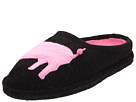

In [14]:
import PIL
import PIL.Image

boots = list(data_dir.glob('Boots/*.jpg'))
sandals = list(data_dir.glob('Sandals/*.jpg'))
shoes = list(data_dir.glob('Shoes/*.jpg'))
slippers = list(data_dir.glob('Slippers/*.jpg'))

PIL.Image.open(str(slippers[0]))

In [15]:
sandals[0], slippers[1], 

(PosixPath('data/Sandals/7293837.261626.jpg'),
 PosixPath('data/Slippers/7486138.359.jpg'))

In [16]:
# double check the dimention of each image
import cv2
boots_shapes = []
sandals_shapes = []
shoes_shapes = []
slippers_shapes = []
for i in range(boots_count):
  im1 = cv2.imread(str(boots[i]))
  boots_shapes.append(im1.shape)

for i in range(sandals_count):
  im2 = cv2.imread(str(sandals[i]))
  sandals_shapes.append(im2.shape)

for i in range(shoes_count):
  im3 = cv2.imread(str(shoes[i]))
  shoes_shapes.append(im3.shape)

for i in range(slippers_count):
  im4 = cv2.imread(str(slippers[i]))
  slippers_shapes.append(im4.shape)

  # print(type(im))  # <class 'numpy.ndarray'>


In [17]:
np.mean(boots_shapes, axis=0), np.mean(sandals_shapes, axis=0), np.mean(shoes_shapes, axis=0), np.mean(slippers_shapes, axis=0)

(array([102., 136.,   3.]),
 array([102.        , 135.99965163,   3.        ]),
 array([102., 136.,   3.]),
 array([102., 136.,   3.]))

In [18]:
for i in range(sandals_count):
  if sandals_shapes[i][1]< 136:
    print(sandals_shapes[i])


(102, 135, 3)
(102, 135, 3)


In [19]:
sandals_shapes[1][1]

136

# Image Preprocessing 

## Create The dataset for TF

In [20]:
image_size = (102, 136) 
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    labels = 'inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    labels = 'inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 50025 files belonging to 4 classes.
Using 40020 files for training.
Found 50025 files belonging to 4 classes.
Using 10005 files for validation.


In [21]:
# View a single example entry from a batch
features, label = iter(train_ds).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(102, 136, 3), dtype=float32)
example label: tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


In [22]:
# The class names that is inferred from the folders names
class_names = train_ds.class_names
print(class_names)

['Boots', 'Sandals', 'Shoes', 'Slippers']


In [23]:
print("example label:", list(label[0].numpy()).index(1))

example label: 2


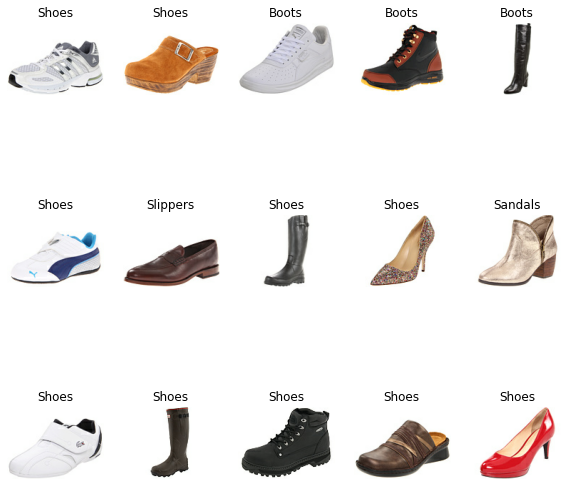

In [24]:
#Visualize a random subset of the training data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[list(label[i].numpy()).index(1)])    
    plt.axis("off")

In [25]:
# Check the batch shape
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 102, 136, 3)
(32, 4)


In [26]:
# Configure and normalize the dataset for performance

# train_ds = train_ds.prefetch(buffer_size=32)
# val_ds = val_ds.prefetch(buffer_size=32)

AUTOTUNE = tf.data.AUTOTUNE
norm_layer = layers.experimental.preprocessing.Rescaling(1./255)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (norm_layer(x), y))   #  pixels values be in '[0,1]'

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (norm_layer(x), y))       #  pixels values be in '[0,1]'

# Create the model with InceptionV3

In [30]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input
import time


In [31]:
# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(102, 136, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


87916544/87910968 [==============================] - 0s 0us/step


## 1- Train only the top layers

In [32]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [42]:
epochs = 10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)

start_time = time.time()

history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

print(f"\nTrained for {time.time() - start_time} seconds ")

Epoch 1/10
1251/1251 [==============================] - 57s 43ms/step - loss: 0.3239 - accuracy: 0.8943 - val_loss: 0.3545 - val_accuracy: 0.8926
Epoch 2/10
1251/1251 [==============================] - 51s 40ms/step - loss: 0.2490 - accuracy: 0.9185 - val_loss: 0.4191 - val_accuracy: 0.8867
Epoch 3/10
1251/1251 [==============================] - 50s 40ms/step - loss: 0.2053 - accuracy: 0.9385 - val_loss: 0.4579 - val_accuracy: 0.8904
Epoch 4/10
1251/1251 [==============================] - 50s 40ms/step - loss: 0.1537 - accuracy: 0.9506 - val_loss: 0.4675 - val_accuracy: 0.8962
Epoch 5/10
1251/1251 [==============================] - 50s 40ms/step - loss: 0.1201 - accuracy: 0.9644 - val_loss: 0.6395 - val_accuracy: 0.8884
Epoch 6/10
1251/1251 [==============================] - 50s 40ms/step - loss: 0.1017 - accuracy: 0.9711 - val_loss: 0.6416 - val_accuracy: 0.8881
Epoch 7/10
1251/1251 [==============================] - 50s 40ms/step - loss: 0.0733 - accuracy: 0.9783 - val_loss: 0.8784 -

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 102, 136, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 67, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 67, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 50, 67, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

## 2- Train the top 2 inception blocks

In [45]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [43]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True


In [44]:
epochs = 10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save2nd_at_{epoch}.h5", monitor='val_loss', verbose=0, save_best_only=True),
]
# model.compile(
#     optimizer='rmsprop', 
#     loss='categorical_crossentropy',
#     metrics=["accuracy"],
# )

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"],)

start_time = time.time()

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

print(f"\nTrained for {time.time() - start_time} seconds ")

Epoch 1/10
1251/1251 [==============================] - 70s 53ms/step - loss: 1.6834 - accuracy: 0.8550 - val_loss: 0.4784 - val_accuracy: 0.8653
Epoch 2/10
1251/1251 [==============================] - 64s 51ms/step - loss: 0.1170 - accuracy: 0.9608 - val_loss: 0.4023 - val_accuracy: 0.8957
Epoch 3/10
1251/1251 [==============================] - 64s 51ms/step - loss: 0.0454 - accuracy: 0.9880 - val_loss: 0.4034 - val_accuracy: 0.9072
Epoch 4/10
1251/1251 [==============================] - 64s 51ms/step - loss: 0.0199 - accuracy: 0.9975 - val_loss: 0.4404 - val_accuracy: 0.9099
Epoch 5/10
1251/1251 [==============================] - 64s 51ms/step - loss: 0.0105 - accuracy: 0.9993 - val_loss: 0.4608 - val_accuracy: 0.9107
Epoch 6/10
1251/1251 [==============================] - 64s 51ms/step - loss: 0.0059 - accuracy: 0.9998 - val_loss: 0.4836 - val_accuracy: 0.9105
Epoch 7/10
1251/1251 [==============================] - 64s 51ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5059 -

## 3- Train the top inception block

In [47]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:299]:
   layer.trainable = False
for layer in model.layers[299:]:
   layer.trainable = True


In [48]:
epochs = 10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save2nd_at_{epoch}.h5", monitor='val_loss', verbose=0, save_best_only=True),
]
# model.compile(
#     optimizer='rmsprop', 
#     loss='categorical_crossentropy',
#     metrics=["accuracy"],
# )

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"],)

start_time = time.time()

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

print(f"\nTrained for {(time.time() - start_time) / 60} minutes ")

Epoch 1/10
1251/1251 [==============================] - 54s 41ms/step - loss: 0.0704 - accuracy: 0.9777 - val_loss: 0.4819 - val_accuracy: 0.9104
Epoch 2/10
1251/1251 [==============================] - 50s 40ms/step - loss: 0.0414 - accuracy: 0.9874 - val_loss: 0.4796 - val_accuracy: 0.9101
Epoch 3/10
1251/1251 [==============================] - 49s 39ms/step - loss: 0.0291 - accuracy: 0.9927 - val_loss: 0.4815 - val_accuracy: 0.9106
Epoch 4/10
1251/1251 [==============================] - 49s 39ms/step - loss: 0.0221 - accuracy: 0.9955 - val_loss: 0.4874 - val_accuracy: 0.9092
Epoch 5/10
1251/1251 [==============================] - 49s 39ms/step - loss: 0.0172 - accuracy: 0.9978 - val_loss: 0.4897 - val_accuracy: 0.9101
Epoch 6/10
1251/1251 [==============================] - 49s 39ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.4898 - val_accuracy: 0.9095
Epoch 7/10
1251/1251 [==============================] - 49s 39ms/step - loss: 0.0128 - accuracy: 0.9990 - val_loss: 0.4997 -

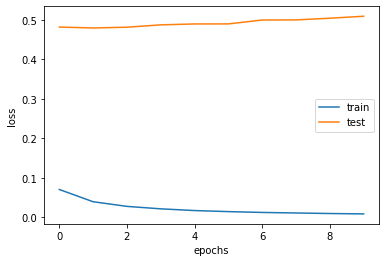

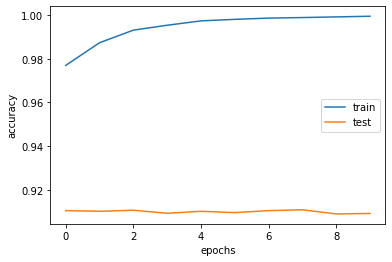

In [50]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.ylabel('loss')
pyplot.xlabel('epochs')
pyplot.show()


pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.xlabel('epochs')
pyplot.show()

# References 

- https://www.tensorflow.org/tutorials/images/classification
- https://keras.io/examples/vision/image_classification_from_scratch/